In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of HAT_P_30b
# https://exoplanetarchive.ipac.caltech.edu/overview/HAT-P-30b

#Binary system
# HAT_P_30 - Star
#  Hosts HAT_P_30b
#  
# HAT_P_30B - Star

In [3]:
df = pd.read_csv("HAT_P_30_literature.csv")#, header=None)
df = df.set_index('Parameter')

In [4]:
df

,TICv8,Gaia DR2,Bonomo et al. 2017,Stassun et al. 2017,Maciejewski et al. 2016,Knutson et al. 2014,Mortier et al. 2013,Enoch et al. 2011,Johnson et al. 2011,Luo et al. 2018,ExoFOP-TESS TOI
Parameter,,,,,,,,,,,
T_eff,6338.000+162.319-124.269,6318.250+195.345-197.550,6304+/-88,6304+/-88,---,---,6338+/-42,6250+/-100,6304+/-88,---,6304
stellar_radius,1.3400400+0.0693714-0.0670357,1.3376081+0.0877378-0.0790275,1.215+/-0.051,1.31+/-0.13,1.330+0.030-0.028,---,1.00+/-0.08,1.33+/-0.03,1.215+/-0.051,---,1.3400399684906+/-0.0682036000000
metallicity,---,---,---,0.13,---,0.13+/-0.08,0.12+/-0.03,---,0.13+/-0.08,---,---
log_g,4.2821300+0.1023570-0.0758918,---,---,4.36+/-0.30,4.284+0.028-0.026,---,4.52+/-0.06,---,4.36+/-0.03,---,4.35913
colour,#1f77b4,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf,b


In [5]:
df_ref_list = df.columns

df_T_eff_list = df.loc['T_eff'] #Stellar effective temperature (K)
df_metallicity_list = df.loc['metallicity'] #Metallicity ([Fe/H])
df_log_g_list = df.loc['log_g'] #Stellar surface gravity (log10(cm/s^2)
df_rs_list = df.loc['stellar_radius']

T_eff_list, T_eff_ref_list = read_df_params(df_T_eff_list, df_ref_list)
metallicity_list, metallicity_ref_list = read_df_params(df_metallicity_list, df_ref_list)
log_g_list, log_g_ref_list = read_df_params(df_log_g_list, df_ref_list)
rs_list, rs_ref_list = read_df_params(df_rs_list, df_ref_list)

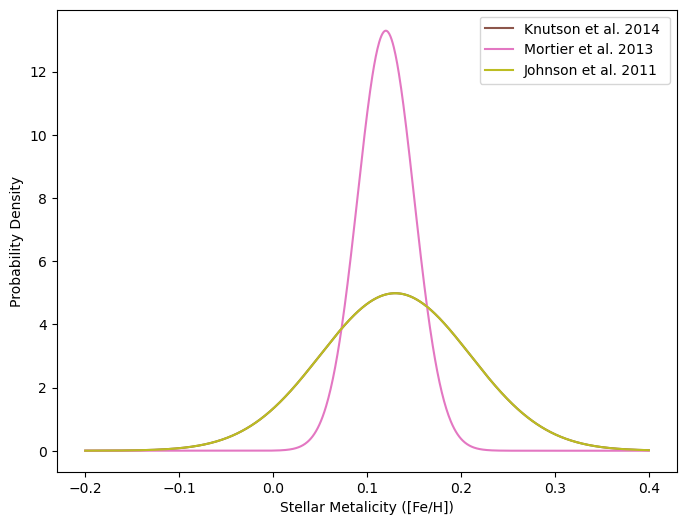

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(-0.2, 0.4, 1000)
for obj, author in zip(metallicity_list, metallicity_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Metalicity ([Fe/H])")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

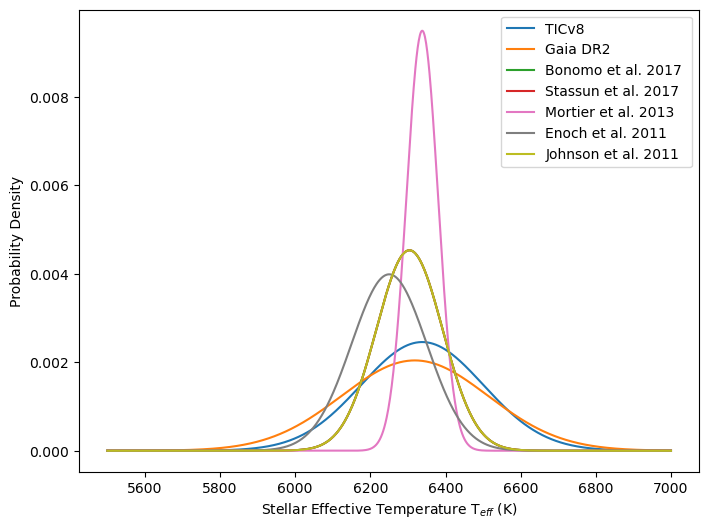

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(5500, 7000, 1000)
for obj, author in zip(T_eff_list, T_eff_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Effective Temperature T$_{eff}$ (K)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

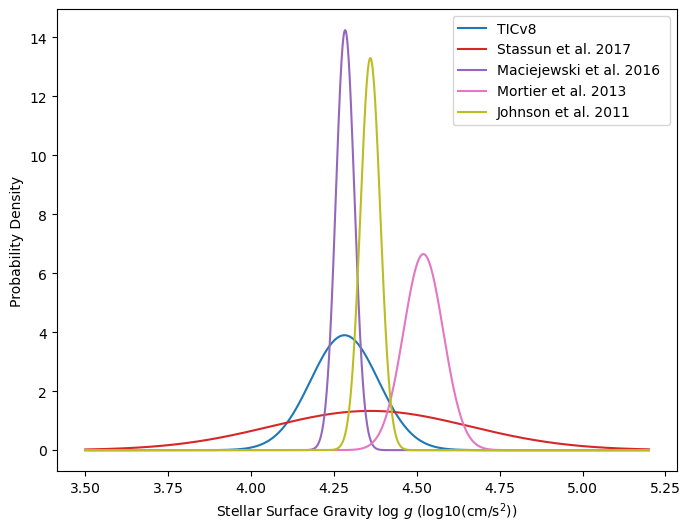

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.5, 5.2, 1000)
for obj, author in zip(log_g_list, log_g_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Surface Gravity log $g$ (log10(cm/s$^2$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

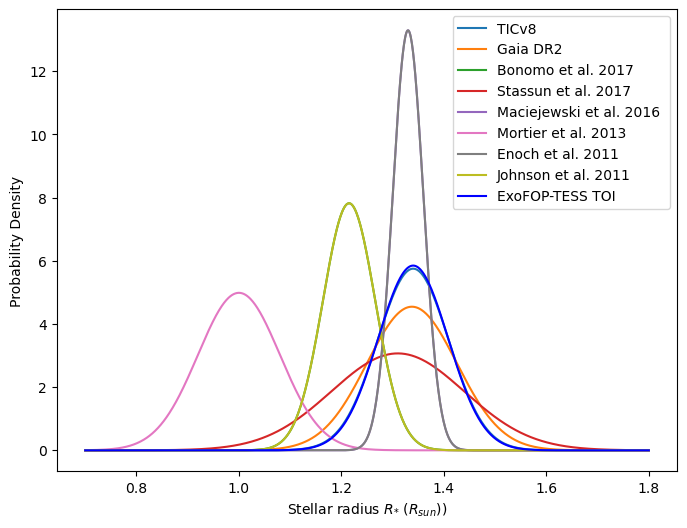

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.7, 1.8, 1000)
for obj, author in zip(rs_list, rs_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar radius $R_{*}$ ($R_{sun}$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()